In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("data/raw_control_group/cover_control.csv")
df.drop(columns=["chars", "words", "tokens"], inplace=True)
df

,Unnamed: 0,text
0,0,"Dear Hiring Manager,\n\nI am writing to expres..."
1,1,"Dear Hiring Manager,\n\nI am writing to expres..."
2,2,"Dear Hiring Manager,\n\nI am excited to apply ..."
3,3,"Dear Hiring Manager,\n\nI am writing to expres..."
4,4,"Dear [Hiring Manager],\n\nI am writing to expr..."
...,...,...
95,95,"Dear Hiring Manager,\n\nI am writing to expres..."
96,96,"Dear Hiring Manager,\n\nI am writing to expres..."
97,97,"Dear Hiring Manager,\n\nI am writing to expres..."
98,98,"Dear Hiring Manager,\n\nI am writing to expres..."


In [3]:
sia = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis to a message
def get_sentiment(message):
    sentiment = sia.polarity_scores(message)
    return sentiment["compound"]

df["sentiment"] = df["text"].apply(get_sentiment)

In [4]:
# Readability Scores
df["flesch_kincaid"] = df["text"].apply(textstat.flesch_reading_ease)
df["gunning_fog"] = df["text"].apply(textstat.gunning_fog)

In [5]:
# Lexical Diversity
def lexical_diversity(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

df["lexical_diversity"] = df["text"].apply(lexical_diversity)

In [6]:
# Syntactic Complexity (average sentence length)
def avg_sentence_length(text):
    sentences = textstat.sentence_count(text)
    return len(text.split()) / sentences if sentences > 0 else 0

df["avg_sentence_length"] = df["text"].apply(avg_sentence_length)

In [7]:
# Vocabulary Level
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
df["vocabulary_level"] = np.sum(X.toarray(), axis=1)

In [8]:
df

,Unnamed: 0,text,sentiment,flesch_kincaid,gunning_fog,lexical_diversity,avg_sentence_length,vocabulary_level
0,0,"Dear Hiring Manager,\n\nI am writing to expres...",0.9977,37.27,19.07,0.601695,33.714286,220
1,1,"Dear Hiring Manager,\n\nI am writing to expres...",0.9960,46.00,15.53,0.628319,25.111111,214
2,2,"Dear Hiring Manager,\n\nI am excited to apply ...",0.9971,34.12,21.60,0.606335,36.833333,207
3,3,"Dear Hiring Manager,\n\nI am writing to expres...",0.9970,34.94,20.70,0.601852,36.000000,196
4,4,"Dear [Hiring Manager],\n\nI am writing to expr...",0.9960,31.55,20.33,0.631336,31.000000,201
...,...,...,...,...,...,...,...,...
95,95,"Dear Hiring Manager,\n\nI am writing to expres...",0.9981,37.07,18.73,0.546125,33.875000,250
96,96,"Dear Hiring Manager,\n\nI am writing to expres...",0.9965,32.30,21.04,0.554404,38.600000,175
97,97,"Dear Hiring Manager,\n\nI am writing to expres...",0.9969,16.83,24.94,0.553114,45.500000,255
98,98,"Dear Hiring Manager,\n\nI am writing to expres...",0.9978,30.23,19.90,0.624031,32.250000,239


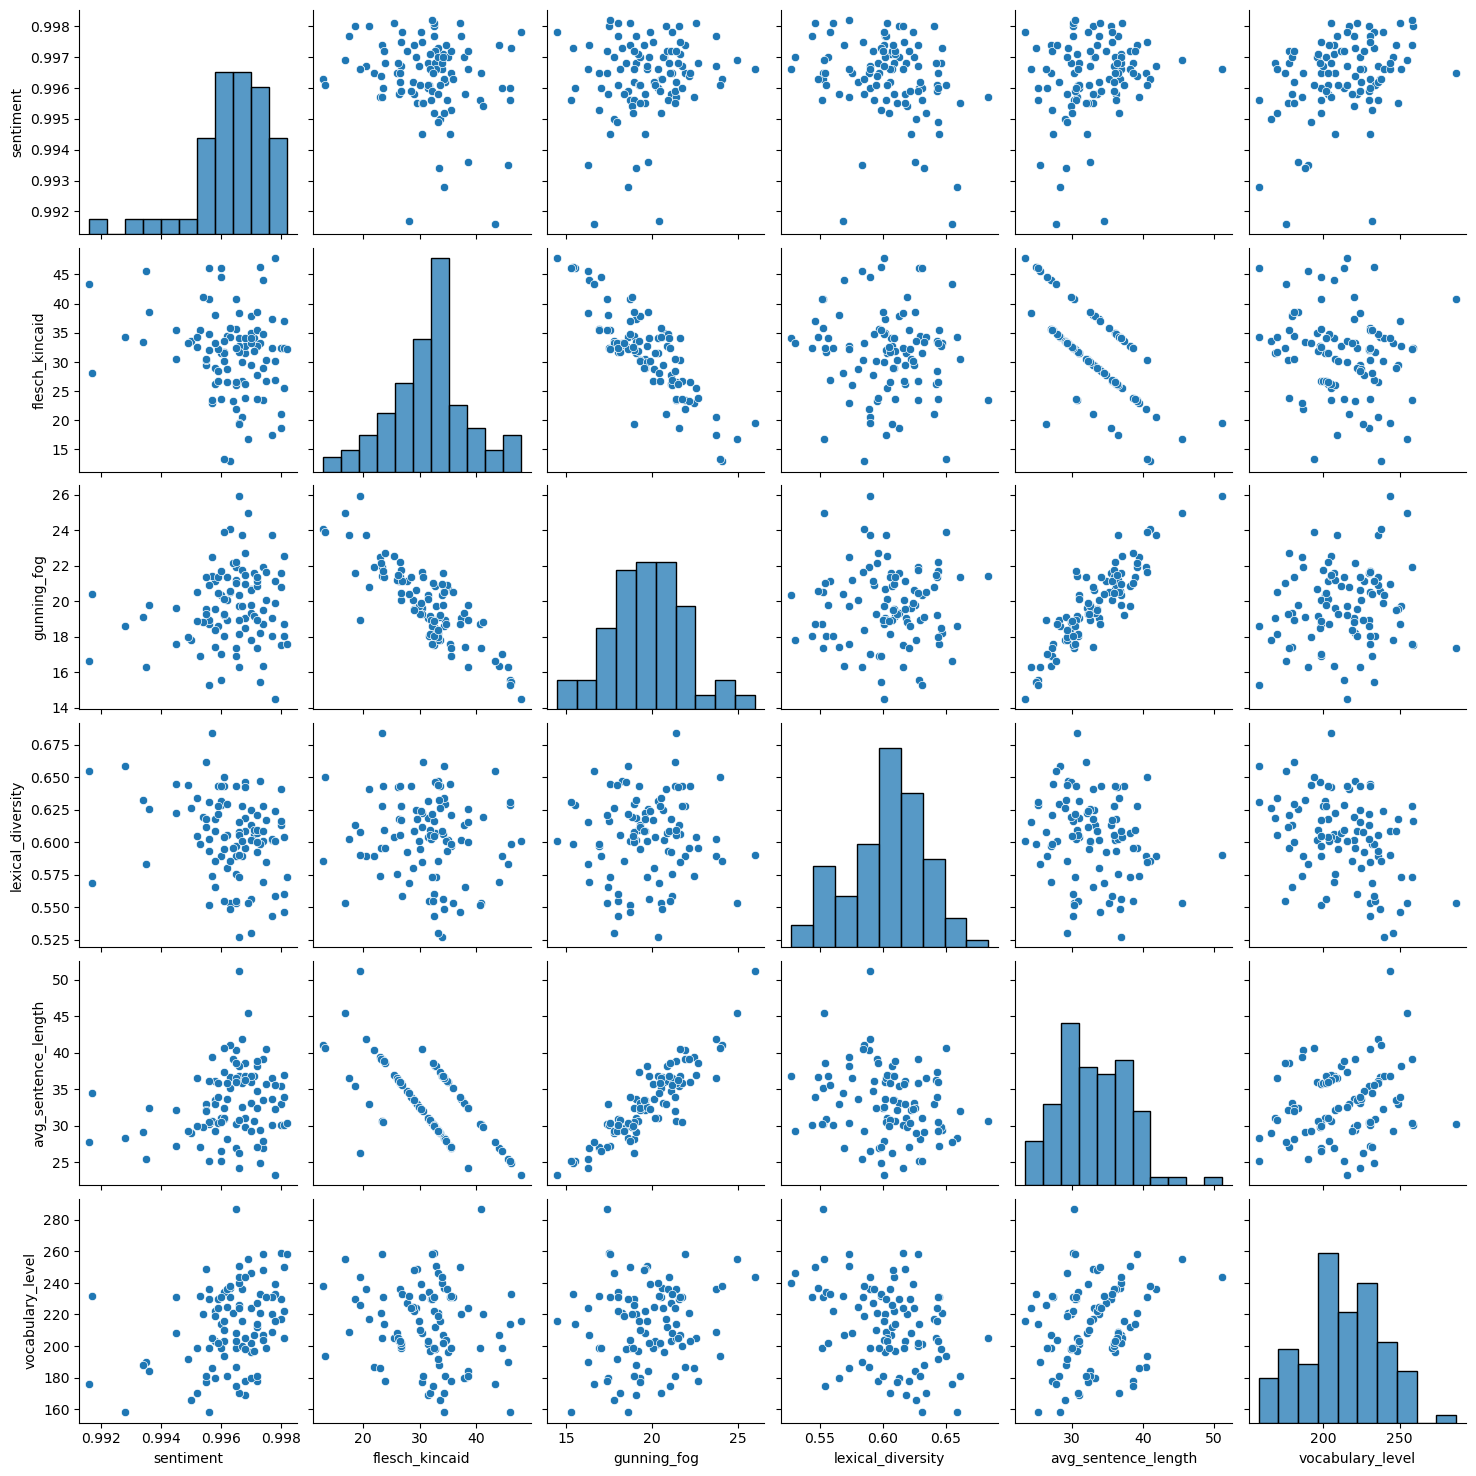

In [9]:
# Plot a histogram for each metric
metrics = ['sentiment', 'flesch_kincaid', 'gunning_fog', 'lexical_diversity', 'avg_sentence_length', 'vocabulary_level']

# Plot a scatter plot matrix
sns.pairplot(df[metrics])
plt.show()

<Axes: >

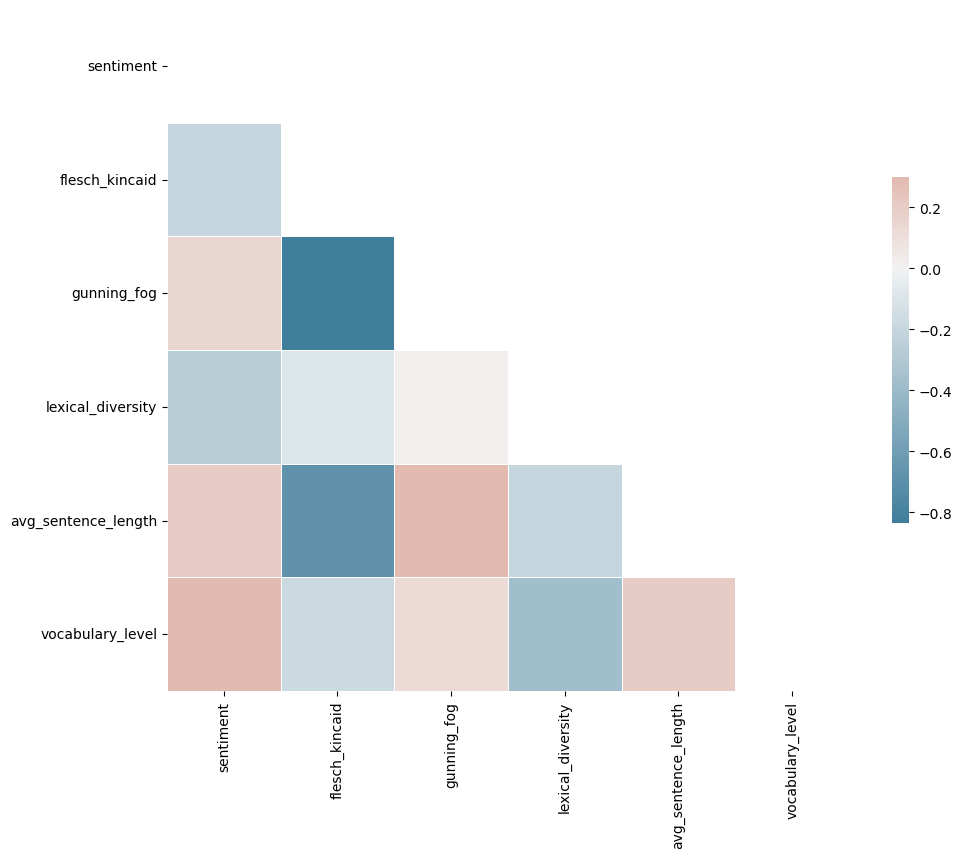

In [10]:
# Compute the correlation matrix
corr = df[metrics].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
